In [0]:
%tensorflow_version 2.x

In [37]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import  Model
from tensorflow.keras.optimizers import SGD, Adam

In [0]:
N = 2 #number of samples
T = 10 #sequence length
D = 3 #number of features
K = 2 #number of output units M = hidden units
X = np.random.randn(N,T,D)

In [0]:
# Auto regressive linear model
M = 5
i = Input(shape=(T,D))
x = SimpleRNN(M)(i)
x = Dense(K)(x)
# model = Model(i,x)
model = Model(i, x)


In [53]:
Yhat  = model.predict(X)
print(Yhat)

[[1.3992625  0.36066666]
 [0.03588264 0.41002345]]


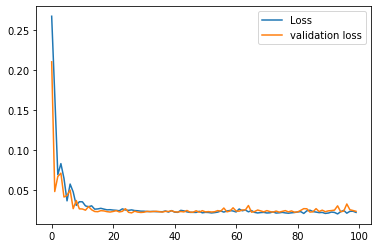

In [54]:
# plot loss
plt.plot(r.history["loss"], label="Loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend()

In [55]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 10, 3)]           0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 5)                 45        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 12        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [56]:
# first output is input hidden DxM
# second output is hidden MxM
# third is bias term vector of length M
a,b,c = model.layers[1].get_weights()
print(a.shape, b.shape,c.shape)

(3, 5) (5, 5) (5,)


In [0]:
Wx, Wh, bh = model.layers[1].get_weights()
Wo, bo = model.layers[2].get_weights() #bo, wo output bias and weight

In [60]:
h_last = np.zeros(M) #initial hidden state
x = X[0] #the one and only sample
Yhats = [] #for storing our outputs

for t in range(T):
  h = np.tanh(x[t].dot(Wx) + h_last.dot(Wh)+bh)
  y = h.dot(Wo)+bo #we care this value on last iteration
  Yhats.append(y)

  h_last = h
print(Yhat, "Final output")

[[1.3992625  0.36066666]
 [0.03588264 0.41002345]] Final output
